# **Hiyerarşik İndeksler**

In [56]:
import numpy as np
import pandas as pd

In [57]:
#Çoklu indekse sahip bir dataframe oluşturulım
seri=pd.Series(np.random.randn(10),index=[['a','a','a','a','b','b','a','c','c','b'],[1,2,3,5,4,6,8,4,1,1]])
seri

a  1    0.192931
   2    0.244275
   3    0.101085
   5   -0.398532
b  4   -0.263293
   6   -0.307022
a  8    0.838818
c  4    2.595127
   1    0.104921
b  1    0.314507
dtype: float64

In [58]:
#indeks bilgilerini görmek için
seri.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('a', 5),
            ('b', 4),
            ('b', 6),
            ('a', 8),
            ('c', 4),
            ('c', 1),
            ('b', 1)],
           )

In [59]:
#'a' indekse sahip verileri görüntülemek için

seri['a']

,0
1,0.192931
2,0.244275
3,0.101085
5,-0.398532
8,0.838818


In [60]:
#Veriyi dilimleme yapmak istersek ilk başta indeksi sıralıyoruz sonra çağırıyoruz
seri = seri.sort_index()
seri['a':'c']

a  1    0.192931
   2    0.244275
   3    0.101085
   5   -0.398532
   8    0.838818
b  1    0.314507
   4   -0.263293
   6   -0.307022
c  1    0.104921
   4    2.595127
dtype: float64

In [61]:
# a ve c indeksine ait değerleri ekrana yazdırabilmek için

seri[['a','c']]

a  1    0.192931
   2    0.244275
   3    0.101085
   5   -0.398532
   8    0.838818
c  1    0.104921
   4    2.595127
dtype: float64

In [62]:
seri.loc[['a','c']]

a  1    0.192931
   2    0.244275
   3    0.101085
   5   -0.398532
   8    0.838818
c  1    0.104921
   4    2.595127
dtype: float64

In [63]:
#içdeki indekse ait verileri çağırmak için

seri[:,1]

,0
a,0.192931
b,0.314507
c,0.104921


In [64]:
#yada böyle her ana indeksin 1. iç indekse ait değeri görebiliriz. Ama önemli olan hepsinde karşıığı olmalı nan değer olmamalı

seri.loc[:,1]

,0
a,0.192931
b,0.314507
c,0.104921


In [65]:
#veriyi tablo halinde görmek istersek. 1. iç indeksin baktığımızda hepsine ait değeri var.

seri.unstack()

,1,2,3,4,5,6,8
a,0.192931,0.244275,0.101085,NaN,-0.398532,NaN,0.838818
b,0.314507,NaN,NaN,-0.263293,NaN,-0.307022,NaN
c,0.104921,NaN,NaN,2.595127,NaN,NaN,NaN


In [66]:
#Tekrar eski haline döndürmek için

seri.unstack().stack()

a  1    0.192931
   2    0.244275
   3    0.101085
   5   -0.398532
   8    0.838818
b  1    0.314507
   4   -0.263293
   6   -0.307022
c  1    0.104921
   4    2.595127
dtype: float64

In [67]:
#tablo da çoklu hiyerarşik indeksler

tablo =pd.DataFrame(np.arange(12).reshape(4,3),index=[["A","B","C","A"],[1,2,3,4]],columns=[["say","söz","say"],["mat","ede","mat"]])
tablo

,,say,söz,say
,,mat,ede,mat
A,1,0,1,2
B,2,3,4,5
C,3,6,7,8
A,4,9,10,11


In [68]:
#bu indeklerimizi isimlendirelim

tablo.index.names=["sube","no"]
tablo.columns.names = ["alan","dersler"]

tablo

,alan,say,söz,say
,dersler,mat,ede,mat
sube,no,,,
A,1,0,1,2
B,2,3,4,5
C,3,6,7,8
A,4,9,10,11


In [69]:
#Satısal değerlere ait veriler.
tablo['say']

,dersler,mat,mat
sube,no,,
A,1,0,2
B,2,3,5
C,3,6,8
A,4,9,11


In [70]:
#indeks yerlerini değiştirmek için

tablo.swaplevel("sube","no")

,alan,say,söz,say
,dersler,mat,ede,mat
no,sube,,,
1,A,0,1,2
2,B,3,4,5
3,C,6,7,8
4,A,9,10,11


In [71]:
#indeks sıralama

tablo.sort_index(level=0)

alan    say söz say
dersler mat ede mat
sube no            
A    1    0   1   2
     4    9  10  11
B    2    3   4   5
C    3    6   7   8

In [72]:
#tablo2 =tablo.set_index() foksiyonu ile belirlene sütun indeks yapılabilir.
#drop=False ayarı ile indeks olarak alınan sütun olduğu yerde kalır
#reset_index() ile verş tekrar eski haline döner.

# **Veri Birleştirme**

In [73]:
tablo1 = pd.DataFrame({"anahtar":[1,2,3,4,5,6,8,4],"kod":[3,5,4,1,2,36,5,2],"sınıf":["a","b","c","d","e","a","b","g"]})
tablo2 = pd.DataFrame({"enaktar":[1,22,3,4,5,6,81,4],"kod":[7,3,2,12,25,12,3,5],"sınıf":["a","b","z","d","d","h","a","b"]})

In [74]:
tablo1


,anahtar,kod,sınıf
0,1,3,a
1,2,5,b
2,3,4,c
3,4,1,d
4,5,2,e
5,6,36,a
6,8,5,b
7,4,2,g


In [75]:
tablo2

,enaktar,kod,sınıf
0,1,7,a
1,22,3,b
2,3,2,z
3,4,12,d
4,5,25,d
5,6,12,h
6,81,3,a
7,4,5,b


In [76]:
#tablo birleştirme "kod" sütununa göre birleştidi.

pd.merge(tablo1,tablo2)

,anahtar,kod,sınıf,enaktar
0,1,3,a,81
1,2,5,b,4
2,8,5,b,4


In [77]:
#hangi sütuna göre birleştireceğimizi elle de seçebiliriz..

pd.merge(tablo1,tablo2,on="kod")

,anahtar,kod,sınıf_x,enaktar,sınıf_y
0,1,3,a,22,b
1,1,3,a,81,a
2,2,5,b,4,b
3,5,2,e,3,z
4,8,5,b,4,b
5,4,2,g,3,z


In [78]:
#Eğer birleştireceğimiz sütun adları farklı ise

pd.merge(tablo1,tablo2,left_on="anahtar",right_on="enaktar")

,anahtar,kod_x,sınıf_x,enaktar,kod_y,sınıf_y
0,1,3,a,1,7,a
1,3,4,c,3,2,z
2,4,1,d,4,12,d
3,4,1,d,4,5,b
4,4,2,g,4,5,b
5,5,2,e,5,25,d
6,6,36,a,6,12,h
7,4,2,g,4,12,d


In [79]:
#Karşılığı olmayan değerleri yazdırmak istersek
pd.merge(tablo1,tablo2,left_on="anahtar",right_on="enaktar",how="outer")

,anahtar,kod_x,sınıf_x,enaktar,kod_y,sınıf_y
0,1.0,3.0,a,1.0,7.0,a
1,2.0,5.0,b,NaN,NaN,NaN
2,3.0,4.0,c,3.0,2.0,z
3,4.0,1.0,d,4.0,12.0,d
4,4.0,1.0,d,4.0,5.0,b
5,4.0,2.0,g,4.0,12.0,d
6,4.0,2.0,g,4.0,5.0,b
7,5.0,2.0,e,5.0,25.0,d
8,6.0,36.0,a,6.0,12.0,h
9,8.0,5.0,b,NaN,NaN,NaN


In [80]:
#Soldaki veriye göre sıralamak için
pd.merge(tablo1,tablo2,left_on="anahtar",right_on="enaktar",how="left")

,anahtar,kod_x,sınıf_x,enaktar,kod_y,sınıf_y
0,1,3,a,1.0,7.0,a
1,2,5,b,NaN,NaN,NaN
2,3,4,c,3.0,2.0,z
3,4,1,d,4.0,12.0,d
4,4,1,d,4.0,5.0,b
5,5,2,e,5.0,25.0,d
6,6,36,a,6.0,12.0,h
7,8,5,b,NaN,NaN,NaN
8,4,2,g,4.0,12.0,d
9,4,2,g,4.0,5.0,b


In [81]:
#iki tablodaki ortak değerleri almak istersek
pd.merge(tablo1,tablo2,left_on="anahtar",right_on="enaktar",how="inner")

,anahtar,kod_x,sınıf_x,enaktar,kod_y,sınıf_y
0,1,3,a,1,7,a
1,3,4,c,3,2,z
2,4,1,d,4,12,d
3,4,1,d,4,5,b
4,4,2,g,4,5,b
5,5,2,e,5,25,d
6,6,36,a,6,12,h
7,4,2,g,4,12,d


In [82]:
#Birden fazla anahtar sütunla birleştirmek
pd.merge(tablo1,tablo2,on=["kod","sınıf"])


,anahtar,kod,sınıf,enaktar
0,1,3,a,81
1,2,5,b,4
2,8,5,b,4


In [83]:
#ortak olmayan değerlerde eklensin
pd.merge(tablo1,tablo2,on=["kod","sınıf"],how="outer")

,anahtar,kod,sınıf,enaktar
0,4.0,1,d,NaN
1,5.0,2,e,NaN
2,4.0,2,g,NaN
3,NaN,2,z,3.0
4,1.0,3,a,81.0
5,NaN,3,b,22.0
6,3.0,4,c,NaN
7,2.0,5,b,4.0
8,8.0,5,b,4.0
9,NaN,7,a,1.0


In [84]:
#eğer indekse göre tabloları birleştirmek istersek

tablo1.join(tablo2, lsuffix='_eski', rsuffix='_yeni',how="outer")

,anahtar,kod_eski,sınıf_eski,enaktar,kod_yeni,sınıf_yeni
0,1,3,a,1,7,a
1,2,5,b,22,3,b
2,3,4,c,3,2,z
3,4,1,d,4,12,d
4,5,2,e,5,25,d
5,6,36,a,6,12,h
6,8,5,b,81,3,a
7,4,2,g,4,5,b


In [85]:
#3 tane tabloyu birleştirmek için
#tablo.join([tablo1,tablo2],how="outer")

In [86]:
dizi = np.arange(10).reshape(2,5)
dizi

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [87]:
#diziyi indeks bilgisi kullanmadan birleştirmek için
#axis 1 seçtiğimiz için sütun olarak birleştirir yani yanına ekler. p seçseytın altına eklerdi.
np.concatenate([dizi,dizi],axis=1)

array([[0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9, 5, 6, 7, 8, 9]])

In [88]:
veri = pd.Series([0,1], index=["a","b"])
veri2 =pd.Series([11,1,4], index=["g","c","j"])
veri3 =pd.Series([2,13], index=["h","b"])

In [89]:
#concat metodu ile veriler alt alta ekledin yan yana eklemek için axis 1 değeri vermeliyiz.
pd.concat([veri,veri2,veri3])

,0
a,0
b,1
g,11
c,1
j,4
h,2
b,13


In [90]:
#Süun olarak yana ekleyip sütunlara isim verebiliriz.
pd.concat([veri,veri2,veri3],axis=1,keys=["veri1","veri2","veri3"])

,veri1,veri2,veri3
a,0.0,NaN,NaN
b,1.0,NaN,13.0
g,NaN,11.0,NaN
c,NaN,1.0,NaN
j,NaN,4.0,NaN
h,NaN,NaN,2.0


In [91]:
vs1 = pd.DataFrame(np.random.randn(3,4),
                   index=["1","2","3"],
                   columns=["a","b","c","d"])
vs2 = pd.DataFrame(np.random.randn(3,7),
                   index=["1","2","3"],
                   columns=["a","b","c","d","e","f","g"])


In [92]:
vs1

,a,b,c,d
1,-1.029591,3.983576,0.313270,-0.167228
2,-0.423905,0.544870,1.181143,-1.612176
3,0.700190,-0.085157,0.136778,-0.351718


In [93]:
vs2

,a,b,c,d,e,f,g
1,0.373886,-1.447150,-0.063870,-0.063729,0.548568,0.494941,-0.199692
2,-0.454932,0.357376,-0.458134,0.241000,-0.468756,0.765780,-0.491969
3,-0.451290,0.747233,1.213019,0.633072,-0.400723,-0.940632,1.149701


In [94]:
#iki dataframe i gruplayarak birleştirdik.
pd.concat([vs1,vs2],axis=0,sort=False,keys=["Grup 1","Grup 2"])
#

a         b         c         d         e         f         g
Grup 1 1 -1.029591  3.983576  0.313270 -0.167228       NaN       NaN       NaN
       2 -0.423905  0.544870  1.181143 -1.612176       NaN       NaN       NaN
       3  0.700190 -0.085157  0.136778 -0.351718       NaN       NaN       NaN
Grup 2 1  0.373886 -1.447150 -0.063870 -0.063729  0.548568  0.494941 -0.199692
       2 -0.454932  0.357376 -0.458134  0.241000 -0.468756  0.765780 -0.491969
       3 -0.451290  0.747233  1.213019  0.633072 -0.400723 -0.940632  1.149701

In [95]:
#indeksleri olmayan tabloları birleştirme

veri= pd.DataFrame(np.random.randn(3,4),columns=["a","b","c","d"])
veri1= pd.DataFrame(np.random.randn(5,4),columns=["d","a","f","g"])

In [96]:
pd.concat([veri,veri1],ignore_index=True,sort=False)

,a,b,c,d,f,g
0,-0.002204,1.263936,1.566006,1.244813,NaN,NaN
1,1.380773,-0.251928,1.282825,-0.915030,NaN,NaN
2,-0.721958,-0.436221,0.490964,0.004844,NaN,NaN
3,1.208250,NaN,NaN,0.935602,-0.112645,0.161539
4,0.101246,NaN,NaN,-0.504076,-0.342637,-0.326156
5,0.241093,NaN,NaN,-1.411370,0.326066,1.625959
6,-1.177169,NaN,NaN,0.543096,-0.774437,-1.552761
7,-1.800898,NaN,NaN,-0.682261,0.371207,0.207831


In [97]:
#Veriyi çevirmek için transpose işlemi için
veri.T

,0,1,2
a,-0.002204,1.380773,-0.721958
b,1.263936,-0.251928,-0.436221
c,1.566006,1.282825,0.490964
d,1.244813,-0.915030,0.004844


In [98]:
#Veriyi uzun formata çevirmek için
uzun=veri.stack()

In [99]:
uzun.unstack()

,a,b,c,d
0,-0.002204,1.263936,1.566006,1.244813
1,1.380773,-0.251928,1.282825,-0.915030
2,-0.721958,-0.436221,0.490964,0.004844


In [100]:
veri= pd.DataFrame(np.arange(16).reshape(4,4),columns=[["say","say","söz","söz"],["mat","ing","mat","ing"]],index=[["a","b","c","d"],[1,2,1,2]])
veri

say     söz    
    mat ing mat ing
a 1   0   1   2   3
b 2   4   5   6   7
c 1   8   9  10  11
d 2  12  13  14  15

In [101]:
#satırları ve sütunları iki seviyeden oluşan bir dataframe hazırladık.
veri.index.names=["sınıf","sınav"]
veri.columns.names=["alan","ders"]
veri

alan        say     söz    
ders        mat ing mat ing
sınıf sınav                
a     1       0   1   2   3
b     2       4   5   6   7
c     1       8   9  10  11
d     2      12  13  14  15

In [102]:
uzun=veri.stack()
uzun

/tmp/ipython-input-2358604020.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  uzun=veri.stack()


alan              say  söz
sınıf sınav ders          
a     1     ing     1    3
            mat     0    2
b     2     ing     5    7
            mat     4    6
c     1     ing     9   11
            mat     8   10
d     2     ing    13   15
            mat    12   14

In [103]:
uzun.unstack()

alan        say     söz    
ders        ing mat ing mat
sınıf sınav                
a     1       1   0   3   2
b     2       5   4   7   6
c     1       9   8  11  10
d     2      13  12  15  14

In [104]:
#istediğimiz indeks sırasına göre stack yapmak için

veri.stack(0)

/tmp/ipython-input-2437983563.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  veri.stack(0)


ders              mat  ing
sınıf sınav alan          
a     1     say     0    1
            söz     2    3
b     2     say     4    5
            söz     6    7
c     1     say     8    9
            söz    10   11
d     2     say    12   13
            söz    14   15

In [105]:
#aynı şeyi yapar
veri.stack("alan")

/tmp/ipython-input-2879992795.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  veri.stack("alan")


ders              mat  ing
sınıf sınav alan          
a     1     say     0    1
            söz     2    3
b     2     say     4    5
            söz     6    7
c     1     say     8    9
            söz    10   11
d     2     say    12   13
            söz    14   15

In [106]:
stok=pd.DataFrame({"meyveler":["Elma","Armut","Kiraz"],
                   "renk": ["Kırmızı","Sarı","Kırmızı"],
                   "vitamin":[100,150,75],
                   "fiyat":[12,9,10]})

stok



,meyveler,renk,vitamin,fiyat
0,Elma,Kırmızı,100,12
1,Armut,Sarı,150,9
2,Kiraz,Kırmızı,75,10


In [107]:
#bu veriyi pivot tabloya dönüştürmek isteyelim. mesela elimizdeki paraya ne alabilirz bakalım

stok.pivot(index="fiyat", columns=["vitamin","renk"], values="meyveler")
#

vitamin,100,150,75
renk,Kırmızı,Sarı,Kırmızı
fiyat,,,
9,NaN,Armut,NaN
10,NaN,NaN,Kiraz
12,Elma,NaN,NaN


In [108]:
stok.pivot(index="meyveler",columns="fiyat")

renk                   vitamin             
fiyat       9        10       12      9     10     12
meyveler                                             
Armut     Sarı      NaN      NaN   150.0   NaN    NaN
Elma       NaN      NaN  Kırmızı     NaN   NaN  100.0
Kiraz      NaN  Kırmızı      NaN     NaN  75.0    NaN

In [109]:
#pivot un ters operatörü melt dir. pivor uzun formanı geniş formata çevirir melt ise tam tersi
#hangisinin indeks ve hangilerinin değer olacağını belirleyebiliriz.
grup=pd.melt(stok,id_vars=["meyveler"],value_vars=["vitamin","renk","fiyat"])
grup
#

,meyveler,variable,value
0,Elma,vitamin,100
1,Armut,vitamin,150
2,Kiraz,vitamin,75
3,Elma,renk,Kırmızı
4,Armut,renk,Sarı
5,Kiraz,renk,Kırmızı
6,Elma,fiyat,12
7,Armut,fiyat,9
8,Kiraz,fiyat,10


In [110]:
modely=pd.read_excel("/content/model_y_sales_data_turkey.xlsx")

In [111]:
modely.melt(id_vars=["model_details"],value_vars=["prices","year"]).head()
#

,model_details,variable,value
0,RWD (Juniper),prices,1790000
1,Long Range (Legacy),prices,1735000
2,RWD (Legacy),prices,1875000
3,RWD (Legacy),prices,1899750
4,RWD (Legacy),prices,1850000


# **Grouby**

In [112]:
#karışık gelen sınıf bilgilerini dertler sınıflandırma yapıp işlemler yapabiliriz.
#Gerçek veriler üzerinden gidelim.

modely.head()

,model_details,year,km,colors,prices,dates,citys,Fiyatlama
0,RWD (Juniper),2024,16500,Siyah,1790000,2026-01-29,İstanbul,9.754768
1,Long Range (Legacy),2023,26000,Beyaz,1735000,2026-01-29,İstanbul,9.971264
2,RWD (Legacy),2024,14800,Beyaz,1875000,2026-02-06,İstanbul,10.124190
3,RWD (Legacy),2024,17000,Beyaz,1899750,2026-01-31,Kütahya,10.381148
4,RWD (Legacy),2024,26000,Beyaz,1850000,2026-02-02,İstanbul,10.632184


In [209]:
#veri setimizde boş değer var mı kontrolü

modely.isnull().sum()

,0
model_details,0
year,0
km,0
colors,0
prices,0
dates,0
citys,0
Fiyatlama,0


In [210]:
#Veri setimizde tekrar eden değer var mı?

modely.duplicated().sum()

np.int64(0)

In [211]:
#DataFrame'indeki 'km' sütununda en sık görülen değeri (modu) bulur.
modely['km'].mode()[0]

np.int64(6001)

In [215]:
#Beyaz araçlar hangi şehirde kaç tane var.
modely[modely['colors'] == "Beyaz"]["citys"].value_counts()
#

,count
citys,
İstanbul,113
Ankara,48
İzmir,16
Bursa,15
Antalya,14
Manisa,13
Konya,12
Eskişehir,10
Mersin,9


In [113]:
#Bir filtreleme yada seçme yaparak başka bir değişkene ait değerlerle işlem yapalım. 2025 model hangi renkten kaç tane araba var
modely[modely['year']==2025].colors.value_counts()
#

,count
colors,
Siyah,234
Beyaz,82
Gri,77
Füme,53
Kırmızı,39
Mavi,30
Gümüş Gri,28
Lacivert,8
Bordo,3


In [114]:
#Eğer bunun yüzdelik olarak görmek istersek
modely[modely['year']==2025].colors.value_counts(normalize=True)*100
#
#

,proportion
colors,
Siyah,42.086331
Beyaz,14.748201
Gri,13.848921
Füme,9.532374
Kırmızı,7.014388
Mavi,5.395683
Gümüş Gri,5.035971
Lacivert,1.438849
Bordo,0.539568


In [115]:
#Modellerin yıllara göre yüzdelik dağılımı
modely.groupby("model_details").year.value_counts(normalize=True)*100


model_details          year
Long Range (Juniper)   2025    100.000000
Long Range (Legacy)    2023     97.857143
                       2021      0.714286
                       2022      0.714286
                       2025      0.714286
Performance (Juniper)  2025    100.000000
Performance (Legacy)   2023     96.694215
                       2022      3.305785
Premium (Juniper)      2025    100.000000
RWD (Juniper)          2025     95.081967
                       2024      4.918033
RWD (Legacy)           2024     78.165939
                       2025     21.834061
Standart (Juniper)     2025    100.000000
Name: proportion, dtype: float64

In [116]:
#Tarih sütununda yılları alalım

modely.dates.astype(str).str.slice(0,4)
#

,dates
0,2026
1,2026
2,2026
3,2026
4,2026
...,...
993,2026
994,2026
995,2026
996,2026


In [117]:
#hangi tarihten kaç tane var bakmak için
modely.dates.astype(str).str.slice(0,4).value_counts()
#

,count
dates,
2026,998


In [118]:
#Tarihle ilgili örneğin yılı year, ay için month, gün day

modely.dates.dt.year

,dates
0,2026
1,2026
2,2026
3,2026
4,2026
...,...
993,2026
994,2026
995,2026
996,2026


In [119]:
#verimizden bir groupby nesnesi oluşturuyoruz bununla bir işlem yapamayız. bununla birlikte bazı özellikleri fonksiyonları kullanmalıyız
yo=modely['km'].groupby(modely['year'])
yo

In [120]:
#örneğin ortalama

yo.mean()

,km
year,
2021,96300.000000
2022,29318.000000
2023,50084.287402
2024,29667.098901
2025,11124.093525


In [121]:
yo.median()

,km
year,
2021,96300.0
2022,39000.0
2023,48000.0
2024,28700.0
2025,9000.0


In [122]:
yo.max()

,km
year,
2021,96300
2022,45000
2023,143000
2024,93500
2025,43500


In [123]:
yo.min()

,km
year,
2021,96300
2022,0
2023,6001
2024,6001
2025,6001


In [124]:
#istersek iki kategoriye görede gruplama yapabiliriz

veri= modely['prices'].groupby([modely['year'],modely['model_details']])


In [125]:
veri.median()

year  model_details        
2021  Long Range (Legacy)      2280000.0
2022  Long Range (Legacy)      3150000.0
      Performance (Legacy)     2382500.0
2023  Long Range (Legacy)      2340000.0
      Performance (Legacy)     2550000.0
2024  RWD (Juniper)            2103000.0
      RWD (Legacy)             2240000.0
2025  Long Range (Juniper)     3500000.0
      Long Range (Legacy)      2875000.0
      Performance (Juniper)    4492000.0
      Premium (Juniper)        2875000.0
      RWD (Juniper)            2880000.0
      RWD (Legacy)             2325000.0
      Standart (Juniper)       2850000.0
Name: prices, dtype: float64

In [126]:
#istersek belli bir kategorinin diğer sayısal değişkenler için işlem sonuçlarını görebiliriz.
modely.groupby("model_details").mean(numeric_only=True)

,year,km,prices,Fiyatlama
model_details,,,,
Long Range (Juniper),2025.000000,10762.181818,3.505727e+06,18.525308
Long Range (Legacy),2022.992857,51918.764286,2.394442e+06,16.702043
Performance (Juniper),2025.000000,6026.000000,4.492000e+06,23.157742
Performance (Legacy),2022.966942,47121.462810,2.644762e+06,17.521808
Premium (Juniper),2025.000000,10005.642276,2.910770e+06,15.324821
RWD (Juniper),2024.950820,12044.557377,2.841918e+06,15.116798
RWD (Legacy),2024.218341,27796.266376,2.262712e+06,13.203889
Standart (Juniper),2025.000000,10034.553191,2.835597e+06,14.934057


In [127]:
#iki kategorik değişken içinde bunu yapabilirim.
modely.groupby(["model_details","year"]).mean(numeric_only=True)

km        prices  Fiyatlama
model_details         year                                       
Long Range (Juniper)  2025  10762.181818  3.505727e+06  18.525308
Long Range (Legacy)   2021  96300.000000  2.280000e+06  21.986500
                      2022      0.000000  3.150000e+06  15.750000
                      2023  52308.773723  2.386254e+06  16.684146
                      2025   6025.000000  2.875000e+06  14.821498
Performance (Juniper) 2025   6026.000000  4.492000e+06  23.157742
Performance (Legacy)  2022  36647.500000  2.435000e+06  14.954771
                      2023  47479.547009  2.651933e+06  17.609570
Premium (Juniper)     2025  10005.642276  2.910770e+06  15.324821
RWD (Juniper)         2024  31166.666667  2.047667e+06  12.309589
                      2025  11055.482759  2.883000e+06  15.261999
RWD (Legacy)          2024  29641.966480  2.245689e+06  13.256867
                      2025  21188.660000  2.323655e+06  13.014229
Standart (Juniper)    2025  10034.553191  2.835597e+06  14.934057

In [128]:
#Modellere göre gruplamak istersek
parca= dict(list(modely.groupby("model_details")))
parca
#

{'Long Range (Juniper)':             model_details  year     km   colors   prices      dates  \
 857  Long Range (Juniper)  2025  10600    Siyah  3200000 2026-01-31   
 893  Long Range (Juniper)  2025  10000     Füme  3320000 2026-01-27   
 894  Long Range (Juniper)  2025  20600     Füme  3138000 2026-02-04   
 901  Long Range (Juniper)  2025   9642    Siyah  3350000 2026-02-03   
 916  Long Range (Juniper)  2025   6318      Gri  3500000 2026-01-20   
 922  Long Range (Juniper)  2025  11000    Siyah  3450000 2026-01-25   
 929  Long Range (Juniper)  2025   8097      Gri  3550000 2026-01-28   
 943  Long Range (Juniper)  2025   9750      Gri  3680000 2026-01-27   
 944  Long Range (Juniper)  2025   7000  Kırmızı  3735000 2026-02-07   
 950  Long Range (Juniper)  2025  11000    Siyah  3725000 2026-02-02   
 969  Long Range (Juniper)  2025  14377    Beyaz  3915000 2026-01-29   
 
          citys  Fiyatlama  
 857   İstanbul  16.895459  
 893  Gaziantep  17.473684  
 894     Ankara  17.491

In [129]:
#Boş değerleri kaldırıp yüzdeliğe bakmak için
modely.dropna().describe()

,year,km,prices,dates,Fiyatlama
count,998.000000,998.000000,9.980000e+02,998,998.000000
mean,2024.289579,24597.902806,2.648742e+06,2026-01-30 12:50:30.060120320,15.262367
min,2021.000000,0.000000,1.735000e+06,2026-01-18 00:00:00,9.754768
25%,2023.000000,7973.750000,2.300000e+06,2026-01-26 00:00:00,14.106469
50%,2025.000000,15275.000000,2.738500e+06,2026-01-31 00:00:00,15.000000
75%,2025.000000,34000.000000,2.899000e+06,2026-02-04 00:00:00,15.949184
max,2025.000000,143000.000000,4.494000e+06,2026-02-08 00:00:00,35.964912
std,0.870393,22685.683688,3.737386e+05,NaN,2.334083


In [130]:
#model_detail sekmesinde yer alan modellerimize göre grupladık ve istatistik verilerine bakıp kaydettik.

grup=modely.groupby("model_details")
grup.describe()
#grup.describe().to_csv("deneme.csv")

year                                               \
                       count         mean     min     25%     50%     75%   
model_details                                                               
Long Range (Juniper)    11.0  2025.000000  2025.0  2025.0  2025.0  2025.0   
Long Range (Legacy)    140.0  2022.992857  2021.0  2023.0  2023.0  2023.0   
Performance (Juniper)    2.0  2025.000000  2025.0  2025.0  2025.0  2025.0   
Performance (Legacy)   121.0  2022.966942  2022.0  2023.0  2023.0  2023.0   
Premium (Juniper)      246.0  2025.000000  2025.0  2025.0  2025.0  2025.0   
RWD (Juniper)           61.0  2024.950820  2024.0  2025.0  2025.0  2025.0   
RWD (Legacy)           229.0  2024.218341  2024.0  2024.0  2024.0  2024.0   
Standart (Juniper)     188.0  2025.000000  2025.0  2025.0  2025.0  2025.0   

                                            km                ...  \
                          max       std  count          mean  ...   
model_details                                                 ...   
Long Range (Juniper)   2025.0  0.000000   11.0  10762.181818  ...   
Long Range (Legacy)    2025.0  0.254356  140.0  51918.764286  ...   
Performance (Juniper)  2025.0  0.000000    2.0   6026.000000  ...   
Performance (Legacy)   2023.0  0.179531  121.0  47121.462810  ...   
Premium (Juniper)      2025.0  0.000000  246.0  10005.642276  ...   
RWD (Juniper)          2025.0  0.218039   61.0  12044.557377  ...   
RWD (Legacy)           2025.0  0.414025  229.0  27796.266376  ...   
Standart (Juniper)     2025.0  0.000000  188.0  10034.553191  ...   

                                     dates      Fiyatlama             \
                                       max  std     count       mean   
model_details                                                          
Long Range (Juniper)   2026-02-07 00:00:00  NaN      11.0  18.525308   
Long Range (Legacy)    2026-02-08 00:00:00  NaN     140.0  16.702043   
Performance (Juniper)  2026-02-01 00:00:00  NaN       2.0  23.157742   
Performance (Legacy)   2026-02-08 00:00:00  NaN     121.0  17.521808   
Premium (Juniper)      2026-02-08 00:00:00  NaN     246.0  15.324821   
RWD (Juniper)          2026-02-08 00:00:00  NaN      61.0  15.116798   
RWD (Legacy)           2026-02-08 00:00:00  NaN     229.0  13.203889   
Standart (Juniper)     2026-02-07 00:00:00  NaN     188.0  14.934057   

                                                                              \
                             min        25%        50%        75%        max   
model_details                                                                  
Long Range (Juniper)   16.895459  17.545029  18.253968  19.347651  21.091136   
Long Range (Legacy)     9.971264  14.465409  15.852821  17.585090  35.964912   
Performance (Juniper)  23.150296  23.154019  23.157742  23.161465  23.165187   
Performance (Legacy)   11.666667  15.975306  17.000000  18.341514  26.451613   
Premium (Juniper)      12.500064  14.763138  15.206303  15.600825  22.397078   
RWD (Juniper)           9.754768  14.644351  15.240642  15.536723  17.032967   
RWD (Legacy)           10.124190  12.561497  13.067485  13.664596  19.708920   
Standart (Juniper)     11.855731  14.627075  14.986264  15.448480  17.714286   

                                 
                            std  
model_details                    
Long Range (Juniper)   1.237250  
Long Range (Legacy)    3.516168  
Performance (Juniper)  0.010529  
Performance (Legacy)   2.529167  
Premium (Juniper)      0.995360  
RWD (Juniper)          1.015392  
RWD (Legacy)           1.072533  
Standart (Juniper)     1.086534  

[8 rows x 40 columns]

In [131]:
#modellerin km ye göre istatistiki verileri
grup["km"].describe()
#

,count,mean,std,min,25%,50%,75%,max
model_details,,,,,,,,
Long Range (Juniper),11.0,10762.181818,3922.463431,6318.0,8869.50,10000.0,11000.0,20600.0
Long Range (Legacy),140.0,51918.764286,27935.996868,0.0,33897.00,48000.0,67300.0,143000.0
Performance (Juniper),2.0,6026.000000,33.941125,6002.0,6014.00,6026.0,6038.0,6050.0
Performance (Legacy),121.0,47121.462810,25175.549871,6001.0,30000.00,45000.0,62400.0,122500.0
Premium (Juniper),246.0,10005.642276,4706.493900,6001.0,6027.50,8600.0,12887.5,30000.0
RWD (Juniper),61.0,12044.557377,7857.004118,6001.0,7500.00,10000.0,13991.0,56000.0
RWD (Legacy),229.0,27796.266376,13338.901069,6001.0,18000.00,26000.0,35000.0,93500.0
Standart (Juniper),188.0,10034.553191,5578.045087,6001.0,6001.75,7985.0,12775.0,43500.0


In [132]:
#Grafiği
%matplotlib inline
import matplotlib.pyplot as plt

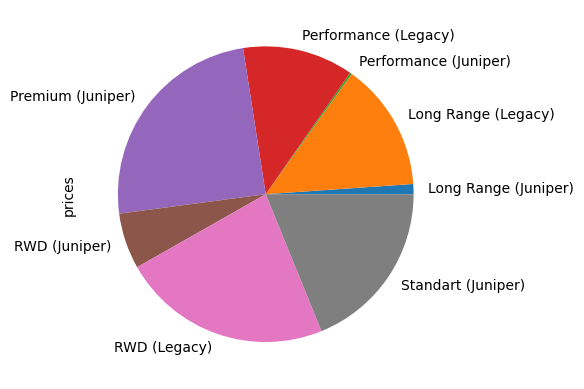

In [133]:
#Adet olarak modellerin pasta grafik dağılımı
grup["prices"].count().plot(kind="pie")
plt.show()

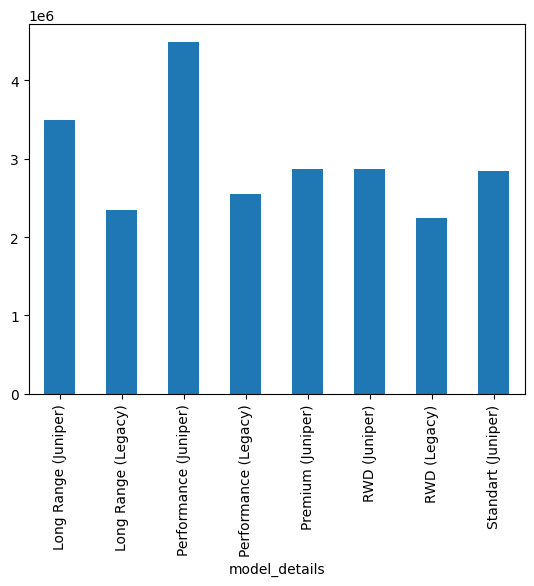

In [134]:
#Fiyat grafiği
grup["prices"].median().plot(kind="bar")
plt.show()

In [135]:
#Aggregation ile groupby fonsiyonlarını daha da çeşitlendirebiliriz.

grup = modely.groupby("model_details")

# Grupun sayısal değere sahip değişkenlerini seçiyoruz.
grup[[ 'km', 'prices']].aggregate(["min","mean","median","max","std"])
#

km                                               \
                        min          mean   median     max           std   
model_details                                                              
Long Range (Juniper)   6318  10762.181818  10000.0   20600   3922.463431   
Long Range (Legacy)       0  51918.764286  48000.0  143000  27935.996868   
Performance (Juniper)  6002   6026.000000   6026.0    6050     33.941125   
Performance (Legacy)   6001  47121.462810  45000.0  122500  25175.549871   
Premium (Juniper)      6001  10005.642276   8600.0   30000   4706.493900   
RWD (Juniper)          6001  12044.557377  10000.0   56000   7857.004118   
RWD (Legacy)           6001  27796.266376  26000.0   93500  13338.901069   
Standart (Juniper)     6001  10034.553191   7985.0   43500   5578.045087   

                        prices                                    \
                           min          mean     median      max   
model_details                                                      
Long Range (Juniper)   3138000  3.505727e+06  3500000.0  3915000   
Long Range (Legacy)    1735000  2.394442e+06  2340000.0  3500000   
Performance (Juniper)  4490000  4.492000e+06  4492000.0  4494000   
Performance (Legacy)   1795000  2.644762e+06  2550000.0  4250000   
Premium (Juniper)      2375000  2.910770e+06  2875000.0  4170000   
RWD (Juniper)          1790000  2.841918e+06  2865000.0  3200000   
RWD (Legacy)           1850000  2.262712e+06  2250000.0  2800000   
Standart (Juniper)     2217000  2.835597e+06  2850000.0  3400000   

                                      
                                 std  
model_details                         
Long Range (Juniper)   243116.881729  
Long Range (Legacy)    279782.255973  
Performance (Juniper)    2828.427125  
Performance (Legacy)   415366.659011  
Premium (Juniper)      189145.295005  
RWD (Juniper)          229500.216921  
RWD (Legacy)           123612.849576  
Standart (Juniper)     205433.108058

In [136]:
#İstenilen sütuna istenilen agg fonksiyonunu uygulayabiliriz.

grup= modely.agg({"km":"mean","prices":"median"})

grup

,0
km,2.459790e+04
prices,2.738500e+06


In [137]:
#istenilen sütuna istedğimiz fonksiyonu yada fonksiyonları uygulayabiliriz.

# İlk olarak, 'model_details' sütununa göre gruplandırma yapalım.
grup_by_model = modely.groupby('model_details')

# Ardından, 'year', 'km' ve 'prices' sütunlarına istenilen aggregation fonksiyonlarını uygulayalım.
sonuc = grup_by_model[['year','km','prices']].agg({"year":"min","km":["min","mean","max"],"prices":"median"})

# 'km' altındaki 'mean' sütununu yuvarla ve tam sayıya çevir
sonuc['km', 'mean'] = sonuc['km', 'mean'].round(0).astype(int)
# 'prices' altındaki 'median' sütununu yuvarla ve tam sayıya çevir
sonuc["prices", "median"] = sonuc["prices", "median"].round(0).astype(int)

# Sayılara binlik ayracı eklemek için formatlama
formatted_sonuc = sonuc.style.format(
    {
        ('km', 'min'): '{:,.0f}',
        ('km', 'mean'): '{:,.0f}',
        ('km', 'max'): '{:,.0f}',
        ('prices', 'median'): '{:,.0f}'
    }
)

# Biçimlendirilmiş DataFrame'i göster
formatted_sonuc

In [138]:
#kendi fonksiyonumuzu da uygulayabiliriz.

def mod(x):
  return x.max()-x.min()

In [139]:
#prices grubumuzda
grup_by_model[['km', 'prices']].agg(mod)

,km,prices
model_details,,
Long Range (Juniper),14282,777000
Long Range (Legacy),143000,1765000
Performance (Juniper),48,4000
Performance (Legacy),116499,2455000
Premium (Juniper),23999,1795000
RWD (Juniper),49999,1410000
RWD (Legacy),87499,950000
Standart (Juniper),37499,1183000


In [140]:
grup=modely.groupby(["model_details","year"])
grup_km=grup["km"]
grup_pr= grup["prices"]

In [141]:
grup_km.agg(["min","median","max",mod])

min   median     max     mod
model_details         year                                
Long Range (Juniper)  2025   6318  10000.0   20600   14282
Long Range (Legacy)   2021  96300  96300.0   96300       0
                      2022      0      0.0       0       0
                      2023   6001  48000.0  143000  136999
                      2025   6025   6025.0    6025       0
Performance (Juniper) 2025   6002   6026.0    6050      48
Performance (Legacy)  2022  20400  40595.0   45000   24600
                      2023   6001  46500.0  122500  116499
Premium (Juniper)     2025   6001   8600.0   30000   23999
RWD (Juniper)         2024  16500  21000.0   56000   39500
                      2025   6001   9925.0   31000   24999
RWD (Legacy)          2024   6001  28900.0   93500   87499
                      2025   6001  20000.0   39066   33065
Standart (Juniper)    2025   6001   7985.0   43500   37499

In [142]:
grup_pr.agg(["min","median","max",mod])

min     median      max      mod
model_details         year                                      
Long Range (Juniper)  2025  3138000  3500000.0  3915000   777000
Long Range (Legacy)   2021  2280000  2280000.0  2280000        0
                      2022  3150000  3150000.0  3150000        0
                      2023  1735000  2340000.0  3500000  1765000
                      2025  2875000  2875000.0  2875000        0
Performance (Juniper) 2025  4490000  4492000.0  4494000     4000
Performance (Legacy)  2022  2325000  2382500.0  2650000   325000
                      2023  1795000  2550000.0  4250000  2455000
Premium (Juniper)     2025  2375000  2875000.0  4170000  1795000
RWD (Juniper)         2024  1790000  2103000.0  2250000   460000
                      2025  2649999  2880000.0  3200000   550001
RWD (Legacy)          2024  1850000  2240000.0  2800000   950000
                      2025  2055000  2325000.0  2520000   465000
Standart (Juniper)    2025  2217000  2850000.0  3400000  1183000

# **Apply Metodu**

In [143]:
#parçalara ayrılmış grupların herbirine herhangi bir fonksiyon uygulamak için kullanılır.

grup= modely.groupby("citys")

grup["prices"].apply(lambda x:x.min())

,prices
citys,
Adana,2030000
Afyonkarahisar,2120000
Aksaray,2795000
Amasya,2290000
Ankara,2050000
Antalya,2125000
Aydın,2250000
Balıkesir,2050000
Bartın,2198000


In [144]:
karne =pd.DataFrame({"isimler":["Mehmet","Özlem","Berin","Ahmet","Mehmet","Sevgi"],
                     "sınıf":["A","B","C","B","A","B"],
                     "notlar":[70,80,75,65,25,np.nan]
                     })
karne

,isimler,sınıf,notlar
0,Mehmet,A,70.0
1,Özlem,B,80.0
2,Berin,C,75.0
3,Ahmet,B,65.0
4,Mehmet,A,25.0
5,Sevgi,B,NaN


In [145]:
grup=karne.groupby("sınıf")

In [146]:
grup["notlar"].mean()

,notlar
sınıf,
A,47.5
B,72.5
C,75.0


In [147]:
#Eksik veri yerine grup ortalamasını yazan fonksiyon

fonk = lambda f:f.fillna(f.mean())

In [148]:
#bunu drek karne["notlar"]
grup["notlar"].apply(fonk)

sınıf   
A      0    70.0
       4    25.0
B      1    80.0
       3    65.0
       5    72.5
C      2    75.0
Name: notlar, dtype: float64

In [149]:
#istersek eksik değerlerin yerine istediğimiz değeri de atayabiliriz.

deger ={"A":100,"B":50, "C": 75} # 'C' grubu için de bir değer eklendi
fonk1 = lambda f:f.fillna(deger[f.name])

In [150]:
grup["notlar"].apply(fonk1)

sınıf   
A      0    70.0
       4    25.0
B      1    80.0
       3    65.0
       5    50.0
C      2    75.0
Name: notlar, dtype: float64

# **Pivot Tablolar**

Groupby metodunun daha boyutlu halidir.

In [151]:
tablo = pd.DataFrame({"sınıf":list("ABCD")*3,
                      "ders":["mat","fen","trh"]*4,
                      "not":[60,50,np.nan,25,90,50]*2,
                      "cinsiyet": list("EKKEEK")*2,
                      "rastgele": np.random.randint(12)
                      })
tablo

,sınıf,ders,not,cinsiyet,rastgele
0,A,mat,60.0,E,8
1,B,fen,50.0,K,8
2,C,trh,NaN,K,8
3,D,mat,25.0,E,8
4,A,fen,90.0,E,8
5,B,trh,50.0,K,8
6,C,mat,60.0,E,8
7,D,fen,50.0,K,8
8,A,trh,NaN,K,8
9,B,mat,25.0,E,8


In [152]:
grup=tablo.groupby("sınıf")

In [153]:
grup["not"].mean()

,not
sınıf,
A,75.000000
B,41.666667
C,75.000000
D,41.666667


In [154]:
#Derslere göre ortalamalara bakmak istersek
tablo.groupby("ders")["not"].mean()


,not
ders,
fen,70.0
mat,42.5
trh,50.0


In [155]:
#Hiyerarşikal bir sıralama yaptık harika
tablo.groupby(["sınıf","ders"])["not"].agg("mean","min","max")

sınıf  ders
A      fen     90.0
       mat     60.0
       trh      NaN
B      fen     50.0
       mat     25.0
       trh     50.0
C      fen     90.0
       mat     60.0
       trh      NaN
D      fen     50.0
       mat     25.0
       trh     50.0
Name: not, dtype: float64

In [156]:
tablo.groupby(["sınıf","ders"])["not"].agg("mean","min","max").unstack()

ders,fen,mat,trh
sınıf,,,
A,90.0,60.0,NaN
B,50.0,25.0,50.0
C,90.0,60.0,NaN
D,50.0,25.0,50.0


In [157]:
#Bu tabloyu pivot.table ile oluşturalım . daha kolaydır.

In [158]:
tablo.pivot_table("not", index="sınıf", columns="ders")

ders,fen,mat,trh
sınıf,,,
A,90.0,60.0,NaN
B,50.0,25.0,50.0
C,90.0,60.0,NaN
D,50.0,25.0,50.0


In [159]:
#Biraz daha oynarsak
tablo.pivot_table("not", index=["sınıf","cinsiyet"], columns="ders").unstack()

ders       fen         mat     trh      
cinsiyet     E     K     E   K   E     K
sınıf                                   
A         90.0   NaN  60.0 NaN NaN   NaN
B          NaN  50.0  25.0 NaN NaN  50.0
C         90.0   NaN  60.0 NaN NaN   NaN
D          NaN  50.0  25.0 NaN NaN  50.0

In [160]:
#satır ve sütunlarının sonuna ortalamaları eklemek istersek

tablo.pivot_table("not", index=["sınıf","cinsiyet"], columns="ders",margins=True)

ders             fen   mat   trh   All
sınıf cinsiyet                        
A     E         90.0  60.0   NaN  75.0
B     E          NaN  25.0   NaN  25.0
      K         50.0   NaN  50.0  50.0
C     E         90.0  60.0   NaN  75.0
D     E          NaN  25.0   NaN  25.0
      K         50.0   NaN  50.0  50.0
All             70.0  42.5  50.0  55.0

In [161]:
#Eğer eksik verilerin yerine değer atamak istersek
tablo.pivot_table("not", index=["sınıf","cinsiyet"], columns="ders",fill_value=(0))
#


ders             fen   mat   trh
sınıf cinsiyet                  
A     E         90.0  60.0   0.0
B     E          0.0  25.0   0.0
      K         50.0   0.0  50.0
C     E         90.0  60.0   0.0
D     E          0.0  25.0   0.0
      K         50.0   0.0  50.0

In [162]:
#tabloda varsayılan değer fonksiyonu mean dır bunu değiştirmek için
tablo.pivot_table("not", index=["sınıf","cinsiyet"], columns="ders",aggfunc="sum")

ders             fen   mat   trh
sınıf cinsiyet                  
A     E         90.0  60.0   NaN
      K          NaN   NaN   0.0
B     E          NaN  25.0   NaN
      K         50.0   NaN  50.0
C     E         90.0  60.0   NaN
      K          NaN   NaN   0.0
D     E          NaN  25.0   NaN
      K         50.0   NaN  50.0

# **Crosstab**

In [163]:
#Çapraz tablolalama
pd.crosstab(tablo["sınıf"],tablo["not"])
#

not,25.0,50.0,60.0,90.0
sınıf,,,,
A,0,0,1,1
B,1,2,0,0
C,0,0,1,1
D,1,2,0,0


In [164]:
pd.crosstab([tablo["sınıf"],tablo["ders"]],tablo['not'])

not         25.0  50.0  60.0  90.0
sınıf ders                        
A     fen      0     0     0     1
      mat      0     0     1     0
B     fen      0     1     0     0
      mat      1     0     0     0
      trh      0     1     0     0
C     fen      0     0     0     1
      mat      0     0     1     0
D     fen      0     1     0     0
      mat      1     0     0     0
      trh      0     1     0     0

# **Kategorik Değişken İşlemleri**

In [165]:
veri= pd.Series(["A","B","A","A"])

In [166]:
#verinin benzersiz değerlerini görmek için

veri.unique()

array(['A', 'B'], dtype=object)

In [167]:
#ya da

pd.unique(veri)

array(['A', 'B'], dtype=object)

In [168]:
#hangisinden kaç tane var görmek istersek
pd.value_counts(veri)

/tmp/ipython-input-2454968905.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(veri)


,count
A,3
B,1


In [169]:
# Ya da

veri.value_counts()

,count
A,3
B,1


In [170]:
degerler= pd.Series([0,1,0,0,1,1])
degerler

,0
0,0
1,1
2,0
3,0
4,1
5,1


In [171]:
# etiketler

etiketler=pd.Series(["Evet","Hayır"])
etiketler
#

,0
0,Evet
1,Hayır


In [172]:
#şimdi değerlerle etiketleri birleştirelim yani 0 evet 1 hayır olacak
#elemanları tam sayı olarak temsil etmeye kategorik temsil denir.

bir=etiketler.take(degerler)
bir

,0
0,Evet
1,Hayır
0,Evet
0,Evet
1,Hayır
1,Hayır


In [173]:
#data fraram çin değişkenlerimizi oluşturduk ve tablodai sıralamasını belirledik.
df= pd.DataFrame({"isim":bir,
                  "no": np.arange(len(bir)),
                  "not":np.random.randint(1,100,size=len(bir)),
                  "kg": np.random.uniform(50,100,size=len(bir)),
                  },
                 columns=["no","isim","not","kg"]
                 )


df

,no,isim,not,kg
0,0,Evet,7,67.821936
1,1,Hayır,53,98.776328
0,2,Evet,63,52.941721
0,3,Evet,10,62.042530
1,4,Hayır,81,63.926310
1,5,Hayır,91,63.235221


In [174]:
#isim değişkeninin tipini sorgulayalım
type(df['isim'])

pandas.core.series.Series

In [175]:
#ya da su yöntemler bir pd. series objesi olduğunu görebiliriz.
df.isim.dtype

dtype('O')

In [176]:
#tip dönüşümü için isim değişkeninin kategorik dönüşümünü yaptık

df['isim']=df["isim"].astype("category")
df['isim']


,isim
0,Evet
1,Hayır
0,Evet
0,Evet
1,Hayır
1,Hayır


In [177]:
#kategorik değişkenin değerlerini öğrenmek istersek
df['isim'].values

['Evet', 'Hayır', 'Evet', 'Evet', 'Hayır', 'Hayır']
Categories (2, object): ['Evet', 'Hayır']

In [178]:
#unların sayısını öğrenmek istersek,ascending ile sıralama yaparız
df['isim'].value_counts(ascending=False)

,count
isim,
Evet,3
Hayır,3


In [179]:
#peki kategorilerini öğrenmek istersek

df['isim'].cat.categories

Index(['Evet', 'Hayır'], dtype='object')

In [180]:
#isimlere karşılık gelen kodları görmek istersek
df['isim'].cat.codes

,0
0,0
1,1
0,0
0,0
1,1
1,1


In [181]:
#Bir veriyi direk kategorikte yapabiliriz.

a=[1,1,0,1,0,0,1,1,1,0,1]

b=pd.Categorical(a)

In [182]:
type(a)


list

In [183]:
type(b)

pandas.core.arrays.categorical.Categorical

In [184]:
#ordinal kategorik yapma otomatik kodladı

insan= ["bebek","çocuk","genç","yetişkin"]
kodlar =[2,1,0,3,1,2,2,1]

insanlar_kat =pd.Categorical.from_codes(kodlar,insan)
insanlar_kat

['genç', 'çocuk', 'bebek', 'yetişkin', 'çocuk', 'genç', 'genç', 'çocuk']
Categories (4, object): ['bebek', 'çocuk', 'genç', 'yetişkin']

In [185]:
#en başta bizim verdiğimiz sıraya göre kategorilendirmişti şimdi sıralı kategori yaptı.
insanlar_kat =pd.Categorical.from_codes(kodlar,insan,ordered=True)
insanlar_kat

['genç', 'çocuk', 'bebek', 'yetişkin', 'çocuk', 'genç', 'genç', 'çocuk']
Categories (4, object): ['bebek' < 'çocuk' < 'genç' < 'yetişkin']

In [186]:
#ya da

insanlar_kat.as_ordered()

['genç', 'çocuk', 'bebek', 'yetişkin', 'çocuk', 'genç', 'genç', 'çocuk']
Categories (4, object): ['bebek' < 'çocuk' < 'genç' < 'yetişkin']

In [187]:
#1000 tana normal dağılıma sahip sayı üretelim.
veri=np.random.randn(1000)


In [188]:
#Daha sonra bu listeyi 4 e bölelim. ve bölümlere isim verelim

böl_veri=pd.qcut(veri,4,labels=["Q1","Q2","Q3","Q4"])
böl_veri
#

['Q1', 'Q4', 'Q3', 'Q3', 'Q2', ..., 'Q4', 'Q1', 'Q3', 'Q1', 'Q4']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [189]:
type(böl_veri)

pandas.core.arrays.categorical.Categorical

In [190]:
#bazı istatistiksel işlem yapmak için verimizi pandas serisine çeviriyoruz.
böl_veri=pd.Series(böl_veri,name="Küme")
böl_veri

,Küme
0,Q1
1,Q4
2,Q3
3,Q3
4,Q2
...,...
995,Q4
996,Q1
997,Q3
998,Q1


In [191]:
pd.Series(veri).groupby(böl_veri).agg(["count","min","max","mean"])
#

/tmp/ipython-input-3410314697.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.Series(veri).groupby(böl_veri).agg(["count","min","max","mean"])


,count,min,max,mean
Küme,,,,
Q1,250,-3.298856,-0.697305,-1.280068
Q2,250,-0.690736,-0.021172,-0.344220
Q3,250,-0.020305,0.618931,0.283025
Q4,250,0.619844,3.213393,1.195156


# **Kategorik Metotlar**

In [192]:
#Kısayoldan kategorik veri oluşturduk.
veri= pd.Series(["A","B","A","D"]*2).astype("category")
veri
#

,0
0,A
1,B
2,A
3,D
4,A
5,B
6,A
7,D


In [193]:
#kodları öğrenelim.
veri.cat.codes

,0
0,0
1,1
2,0
3,2
4,0
5,1
6,0
7,2


In [194]:
veri.cat.categories

Index(['A', 'B', 'D'], dtype='object')

In [195]:
#verimize sonradan yeni kategorler ekleyelim. C yi ekldeik ama bir karşılığı olmadığı için gözükmedi.

yeni_kat=['A','B','C','D']
veri = veri.cat.set_categories(yeni_kat)
#

In [196]:
#Kullanılmayan kategorilerin silinmesi için
veri = veri.cat.remove_unused_categories()
veri

,0
0,A
1,B
2,A
3,D
4,A
5,B
6,A
7,D


# **explode()**

In [197]:
import pandas as pd
import numpy as np

In [198]:
veri=pd.DataFrame()

veri["Takımlar"]=["Galatasaray","Fenerbahçe","Beşiktaş"]
veri["Futbolcular"]=[["Ali","Ümit","Hagi"],["Veli","Osman","Amirim"],["İso","Koçari","Hamsi"]]

veri

,Takımlar,Futbolcular
0,Galatasaray,"[Ali, Ümit, Hagi]"
1,Fenerbahçe,"[Veli, Osman, Amirim]"
2,Beşiktaş,"[İso, Koçari, Hamsi]"


In [199]:
#Böyle bir tabloda oyuncuya göre analiz yapabilmek için kullanırız, uzatmadan farklıdır.

veri.explode("Futbolcular")
#

,Takımlar,Futbolcular
0,Galatasaray,Ali
0,Galatasaray,Ümit
0,Galatasaray,Hagi
1,Fenerbahçe,Veli
1,Fenerbahçe,Osman
1,Fenerbahçe,Amirim
2,Beşiktaş,İso
2,Beşiktaş,Koçari
2,Beşiktaş,Hamsi


In [200]:
veri.unstack()

Takımlar     0              Galatasaray
             1               Fenerbahçe
             2                 Beşiktaş
Futbolcular  0        [Ali, Ümit, Hagi]
             1    [Veli, Osman, Amirim]
             2     [İso, Koçari, Hamsi]
dtype: object

In [201]:
#Matris oluşturup dataframe e dönüştürmek
# 1 ile 100 arasında 10 tane ve 10 sütundan oluşan bir matris oluşturalım
mtr = np.random.randint(1,100,size=(10,10))

mtr

array([[44, 68, 25, 57,  8, 17, 94, 42, 87,  7],
       [16, 55, 40, 59, 57, 14, 58, 29, 63, 73],
       [16, 53, 77, 96, 59, 40, 41, 73, 24, 20],
       [22, 72, 86,  2, 37, 24, 53, 20, 41, 40],
       [14, 27, 23, 34,  2, 67, 49, 86, 18, 98],
       [93, 24, 24, 90, 75, 32, 99, 31, 35,  6],
       [35, 84, 87, 77, 15, 38, 22, 62, 30, 97],
       [68, 93,  9, 28, 58, 91, 70, 55, 24, 83],
       [62, 33, 77, 64, 40, 13, 83, 47, 54, 14],
       [75, 45, 11, 44, 63, 99, 62, 52, 59, 40]])

In [202]:
mtr2=pd.DataFrame(mtr)
mtr2

,0,1,2,3,4,5,6,7,8,9
0,44,68,25,57,8,17,94,42,87,7
1,16,55,40,59,57,14,58,29,63,73
2,16,53,77,96,59,40,41,73,24,20
3,22,72,86,2,37,24,53,20,41,40
4,14,27,23,34,2,67,49,86,18,98
5,93,24,24,90,75,32,99,31,35,6
6,35,84,87,77,15,38,22,62,30,97
7,68,93,9,28,58,91,70,55,24,83
8,62,33,77,64,40,13,83,47,54,14
9,75,45,11,44,63,99,62,52,59,40


In [203]:
import time
#konu ile alakasız ama önemli bir işlemin yapılma süresini ölçmek için

baslangic=time.time()
islem=mtr2.apply(lambda x:x**2)
bitis=time.time()
süre=bitis-baslangic
print(süre)
#

0.002210855484008789


In [204]:
#Bunu daha hızlı yoldan yapmak için

sütunlar =np.arange(10).astype("str")
veri= pd.DataFrame(mtr2.values,columns=sütunlar)
veri
#

,0,1,2,3,4,5,6,7,8,9
0,44,68,25,57,8,17,94,42,87,7
1,16,55,40,59,57,14,58,29,63,73
2,16,53,77,96,59,40,41,73,24,20
3,22,72,86,2,37,24,53,20,41,40
4,14,27,23,34,2,67,49,86,18,98
5,93,24,24,90,75,32,99,31,35,6
6,35,84,87,77,15,38,22,62,30,97
7,68,93,9,28,58,91,70,55,24,83
8,62,33,77,64,40,13,83,47,54,14
9,75,45,11,44,63,99,62,52,59,40


In [205]:
#verimizi istedğimiz sütuna göre sıralamak için
#1. sutun değerlerine göre tüö satırları sıraladı
veri.sort_values(by="1")


,0,1,2,3,4,5,6,7,8,9
5,93,24,24,90,75,32,99,31,35,6
4,14,27,23,34,2,67,49,86,18,98
8,62,33,77,64,40,13,83,47,54,14
9,75,45,11,44,63,99,62,52,59,40
2,16,53,77,96,59,40,41,73,24,20
1,16,55,40,59,57,14,58,29,63,73
0,44,68,25,57,8,17,94,42,87,7
3,22,72,86,2,37,24,53,20,41,40
6,35,84,87,77,15,38,22,62,30,97
7,68,93,9,28,58,91,70,55,24,83


In [206]:
#İşlemi daha hızlı yapan metot
baslangic=time.time()
veri.to_parquet("test.parquet")
bitis=time.time()
sonuc=bitis-baslangic
print(sonuc)

0.1075589656829834


In [207]:
#Belli bir değer arasında filtrele yaparken örneğin

#aralık= tablo["sütun_adı"].beetween(10,20)


In [208]:
#isin gibi içerisinde değer aramak için
#istenen sütun içerisinde içerisinde aranan değer geçen satırları verir.
#ara=tablo.index.str.lower().str.contains("aranan_değer")